In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A simple PCA example

In [2]:
df = pd.read_csv('pca_cluster_example.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.576492,8.348849,1.143433,3.070380,4.322074,-3.267977,-2.317148,1.238390,-3.988355,3.044480,...,11.475242,4.880493,-4.106706,-2.829692,-0.354363,-0.596335,-3.725105,3.876457,3.347243,5.583666
1,6.231579,-6.909648,3.659709,11.929137,2.240637,-7.014308,9.877057,6.800089,-11.338565,3.434879,...,-8.834610,-3.864611,-0.915817,1.547645,9.992266,-7.036443,-1.553898,-11.692399,-9.847901,-3.334365
2,-11.560657,0.598643,-7.455336,8.015223,12.625938,7.787504,-13.316294,6.740579,-3.006134,4.402859,...,-1.986079,-7.330462,4.734443,3.402070,-11.806391,7.998889,-0.614161,1.728439,-2.360111,-2.590537
3,-6.550290,5.927671,-5.294628,-7.605038,2.695970,1.389915,2.661267,-0.280458,0.843996,-5.626816,...,3.687293,7.536552,-8.848124,-9.997195,1.161743,5.950914,3.151530,2.749749,-4.003805,8.976112
4,-9.009463,-3.651560,-5.060981,8.266544,9.569234,7.837779,-11.765950,5.925935,-1.702435,-2.744989,...,0.251041,-10.802287,4.808274,5.338010,-2.925172,12.724998,-0.538965,5.198209,0.674943,-8.440567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8.120845,8.252002,-2.450355,8.515612,1.346545,1.750442,-0.793405,3.133596,0.083944,3.478412,...,12.737101,4.196414,-1.619719,-6.143406,4.940836,-8.228357,-8.065164,-0.238298,1.702209,6.371786
496,6.716442,10.547890,5.827982,6.674144,4.683268,-3.993798,-2.801990,5.165245,-2.700569,4.807455,...,4.792433,7.123087,-3.927749,-4.844566,0.367231,-3.950344,-4.862446,4.347150,1.032675,8.976196
497,2.007847,3.579963,0.385948,11.677537,1.625258,1.047380,-5.265172,12.460762,-0.428898,4.464268,...,8.402251,11.773942,6.007869,-7.083625,-0.300025,-7.624535,-10.741950,-1.845056,1.040268,10.601959
498,4.084515,-4.148737,0.831728,9.306080,-2.564255,-5.351911,5.774251,1.191606,-9.175726,2.303072,...,-9.119350,-1.996299,-6.793233,3.921120,-2.645073,-8.762716,-5.845531,-9.639638,-5.243810,-7.868705


In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-1.754563,1.724382,-2.113429,4.645147,0.977320,-1.444871,-0.187740,5.683902,-0.168050,-2.321397,...,1.762508,0.635095,-2.142698,0.099885,-0.083460,0.335849,-1.782373,0.514010,-3.152871,-0.405587
std,7.227363,6.554717,4.345741,7.342605,5.985315,7.233594,6.499260,4.480348,5.758821,4.745618,...,6.484357,6.793953,4.075573,5.922143,6.676038,7.377665,5.225688,6.192981,5.184253,6.790994
min,-18.972658,-13.670436,-13.831568,-16.760369,-13.365668,-17.632586,-15.101905,-8.499874,-13.970172,-13.725411,...,-18.243686,-17.487023,-12.001102,-13.024959,-15.677071,-17.663483,-13.787820,-16.778900,-16.716626,-14.211821
25%,-7.867804,-3.495650,-4.967804,3.165390,-3.128059,-7.949996,-4.868345,2.421058,-4.143104,-6.050416,...,-2.219820,-4.680365,-5.112067,-5.355730,-5.768515,-5.924502,-5.808491,-1.926588,-7.515137,-6.198974
50%,-2.438217,1.640668,-2.189570,6.886095,1.118312,-0.508086,-0.354958,5.829534,-0.726778,-2.234559,...,2.511842,1.463338,-2.106710,1.038563,1.118395,0.213861,-1.638063,2.023948,-2.719745,-0.659752
75%,4.707962,7.487215,0.831742,9.666943,5.387911,4.267657,4.470868,8.895221,3.792815,1.206816,...,6.306712,5.980659,0.584000,5.173456,5.280402,6.979766,1.759116,4.770837,1.073357,5.906939
max,14.161772,17.265787,9.545705,15.900913,13.645209,13.606730,16.805410,19.264160,15.025531,10.358740,...,16.322113,17.256238,10.448418,13.806113,16.979472,14.714756,11.385158,11.953203,10.257298,14.622133


# EDA

<IPython.core.display.Javascript object>


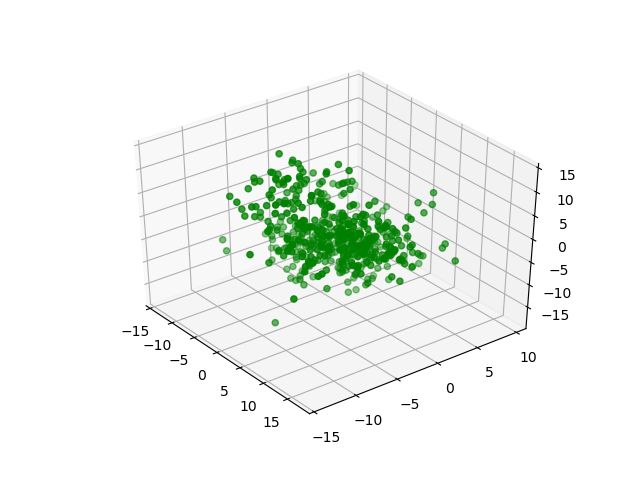

In [9]:
from mpl_toolkits import mplot3d
%matplotlib notebook

dim1 = 1
dim2 = 2
dim3 = 5

ax = plt.axes(projection='3d')
ax.scatter3D(df.iloc[:,dim1], df.iloc[:,dim2], df.iloc[:,dim3], c='g')

# PCA

Standardize

In [10]:
df2 = df - df.mean(axis=0)

In [11]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,...,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,1.156408e-15,2.353673e-16,-1.039169e-15,1.691092e-15,9.450218e-16,2.238210e-16,-2.486900e-17,1.250555e-15,-1.190714e-16,2.681411e-15,...,-4.583001e-16,3.268497e-16,-4.138911e-16,3.499423e-16,7.105427e-17,-2.984279e-16,-1.643130e-15,6.894485e-16,-9.912071e-16,-2.993161e-16
std,7.227363e+00,6.554717e+00,4.345741e+00,7.342605e+00,5.985315e+00,7.233594e+00,6.499260e+00,4.480348e+00,5.758821e+00,4.745618e+00,...,6.484357e+00,6.793953e+00,4.075573e+00,5.922143e+00,6.676038e+00,7.377665e+00,5.225688e+00,6.192981e+00,5.184253e+00,6.790994e+00
min,-1.721809e+01,-1.539482e+01,-1.171814e+01,-2.140552e+01,-1.434299e+01,-1.618771e+01,-1.491417e+01,-1.418378e+01,-1.380212e+01,-1.140401e+01,...,-2.000619e+01,-1.812212e+01,-9.858404e+00,-1.312484e+01,-1.559361e+01,-1.799933e+01,-1.200545e+01,-1.729291e+01,-1.356376e+01,-1.380623e+01
25%,-6.113241e+00,-5.220033e+00,-2.854375e+00,-1.479757e+00,-4.105379e+00,-6.505124e+00,-4.680605e+00,-3.262844e+00,-3.975054e+00,-3.729019e+00,...,-3.982328e+00,-5.315461e+00,-2.969369e+00,-5.455615e+00,-5.685055e+00,-6.260350e+00,-4.026118e+00,-2.440599e+00,-4.362267e+00,-5.793387e+00
50%,-6.836540e-01,-8.371480e-02,-7.614043e-02,2.240947e+00,1.409924e-01,9.367854e-01,-1.672183e-01,1.456327e-01,-5.587274e-01,8.683781e-02,...,7.493338e-01,8.282423e-01,3.598835e-02,9.386783e-01,1.201855e+00,-1.219881e-01,1.443107e-01,1.509938e+00,4.331256e-01,-2.541647e-01
75%,6.462525e+00,5.762833e+00,2.945172e+00,5.021796e+00,4.410591e+00,5.712529e+00,4.658608e+00,3.211320e+00,3.960865e+00,3.528213e+00,...,4.544204e+00,5.345563e+00,2.726698e+00,5.073571e+00,5.363862e+00,6.643918e+00,3.541489e+00,4.256827e+00,4.226228e+00,6.312526e+00
max,1.591634e+01,1.554140e+01,1.165913e+01,1.125577e+01,1.266789e+01,1.505160e+01,1.699315e+01,1.358026e+01,1.519358e+01,1.268014e+01,...,1.455960e+01,1.662114e+01,1.259112e+01,1.370623e+01,1.706293e+01,1.437891e+01,1.316753e+01,1.143919e+01,1.341017e+01,1.502772e+01


In [12]:
df3 = df2/df2.std(axis=0)

In [13]:
df3.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,...,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,1.745271e-16,2.686740e-17,-2.369216e-16,1.900702e-16,1.794120e-16,3.330669e-17,3.330669e-18,2.815526e-16,-3.676226e-17,5.485334e-16,...,-4.396483e-17,8.038015e-17,-9.414691e-17,1.132427e-17,1.576517e-17,-8.482104e-17,-2.793321e-16,1.213474e-16,-1.794120e-16,-9.348078e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.382348e+00,-2.348663e+00,-2.696465e+00,-2.915248e+00,-2.396363e+00,-2.237852e+00,-2.294748e+00,-3.165776e+00,-2.396692e+00,-2.403062e+00,...,-3.085301e+00,-2.667390e+00,-2.418900e+00,-2.216232e+00,-2.335758e+00,-2.439706e+00,-2.297391e+00,-2.792340e+00,-2.616337e+00,-2.033021e+00
25%,-8.458467e-01,-7.963780e-01,-6.568212e-01,-2.015302e-01,-6.859086e-01,-8.992935e-01,-7.201751e-01,-7.282568e-01,-6.902548e-01,-7.857816e-01,...,-6.141439e-01,-7.823811e-01,-7.285770e-01,-9.212230e-01,-8.515611e-01,-8.485545e-01,-7.704474e-01,-3.940910e-01,-8.414455e-01,-8.530986e-01
50%,-9.459246e-02,-1.277169e-02,-1.752070e-02,3.051978e-01,2.355639e-02,1.295048e-01,-2.572883e-02,3.250477e-02,-9.702114e-02,1.829852e-02,...,1.155602e-01,1.219087e-01,8.830256e-03,1.585031e-01,1.800252e-01,-1.653479e-02,2.761563e-02,2.438144e-01,8.354638e-02,-3.742674e-02
75%,8.941747e-01,8.791886e-01,6.777145e-01,6.839256e-01,7.369020e-01,7.897220e-01,7.167905e-01,7.167568e-01,6.877909e-01,7.434676e-01,...,7.007949e-01,7.868120e-01,6.690342e-01,8.567119e-01,8.034499e-01,9.005448e-01,6.777078e-01,6.873631e-01,8.152047e-01,9.295438e-01
max,2.202233e+00,2.371026e+00,2.682888e+00,1.532939e+00,2.116495e+00,2.080792e+00,2.614628e+00,3.031072e+00,2.638314e+00,2.671967e+00,...,2.245343e+00,2.446461e+00,3.089410e+00,2.314403e+00,2.555847e+00,1.948978e+00,2.519770e+00,1.847122e+00,2.586712e+00,2.212890e+00


The Covariance Matrix, $S$.

In [14]:
S = df3.cov()
S

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,-0.218905,0.459907,0.362145,-0.380975,-0.559303,0.515433,-0.147126,-0.407653,0.423708,...,-0.192656,0.133063,-0.150328,-0.002890,0.310897,-0.819109,-0.669572,-0.503410,-0.172883,0.075137
1,-0.218905,1.000000,-0.281300,-0.499858,0.170055,0.413186,-0.145843,-0.143466,0.254626,-0.100847,...,0.749472,0.598473,0.016294,-0.676977,0.359279,0.352420,0.206568,0.494684,0.431432,0.735877
2,0.459907,-0.281300,1.000000,0.341863,-0.514673,-0.592416,0.161888,0.143815,0.046387,0.048405,...,-0.124746,0.027969,-0.253272,0.288884,-0.106900,-0.533814,-0.391058,-0.119940,-0.353851,-0.067775
3,0.362145,-0.499858,0.341863,1.000000,-0.131713,-0.241688,-0.225020,0.472387,-0.265725,0.430544,...,-0.293767,-0.580912,0.239663,0.436559,-0.480473,-0.518622,-0.539508,-0.269111,0.018591,-0.489920
4,-0.380975,0.170055,-0.514673,-0.131713,1.000000,0.722867,-0.243226,-0.034087,-0.284457,0.252217,...,0.061920,-0.247972,0.527072,-0.328387,0.078159,0.464583,0.220219,-0.032626,0.579022,-0.055371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,-0.819109,0.352420,-0.533814,-0.518622,0.464583,0.637281,-0.388343,0.014841,0.359085,-0.389145,...,0.279781,0.034051,0.137335,-0.175882,-0.121210,1.000000,0.705311,0.501565,0.254316,0.082640
26,-0.669572,0.206568,-0.391058,-0.539508,0.220219,0.330711,-0.183359,-0.097368,0.411600,-0.508263,...,0.113530,0.103231,-0.067297,-0.027055,-0.057946,0.705311,1.000000,0.379176,-0.031092,0.041924
27,-0.503410,0.494684,-0.119940,-0.269111,-0.032626,0.262894,-0.548797,0.235362,0.667089,-0.394857,...,0.604947,0.294027,-0.115187,-0.154611,-0.259673,0.501565,0.379176,1.000000,0.119194,0.363245
28,-0.172883,0.431432,-0.353851,0.018591,0.579022,0.654662,-0.318367,0.066960,-0.201375,0.341466,...,0.419404,-0.053363,0.457459,-0.481987,0.108056,0.254316,-0.031092,0.119194,1.000000,0.208533


Eigenvalues and eigenvectors of $S$.

In [15]:
evals, evecs = np.linalg.eig(S)

In [16]:
evals

array([7.41 , 6.408, 5.441, 3.79 , 0.551, 0.525, 0.479, 0.408, 0.387,
       0.355, 0.325, 0.108, 0.316, 0.13 , 0.285, 0.281, 0.266, 0.253,
       0.245, 0.145, 0.23 , 0.224, 0.152, 0.159, 0.208, 0.172, 0.175,
       0.195, 0.192, 0.184])

Projection onto the eigen-basis.

In [17]:
X = df3.values

In [18]:
X

array([[ 0.323,  1.011,  0.749, ...,  0.543,  1.254,  0.882],
       [ 1.105, -1.317,  1.328, ..., -1.971, -1.291, -0.431],
       [-1.357, -0.172, -1.229, ...,  0.196,  0.153, -0.322],
       ...,
       [ 0.521,  0.283,  0.575, ..., -0.381,  0.809,  1.621],
       [ 0.808, -0.896,  0.678, ..., -1.64 , -0.403, -1.099],
       [-0.894, -0.344, -0.831, ...,  0.161,  1.191, -0.573]])

## Projection

Projecting onto the *eigen-basis* is so simple!

---

Recall that to project a vector $\bf x$ onto (the direction of) another vector $\bf v$, we do:

$\displaystyle{{\bf x}_{\parallel,v} = \frac{{\bf x}\cdot{\bf v}}{{\bf v}\cdot{\bf v}}}$

In this case, we want to project each row of our data, $\bf X$, onto the *eigenvectors*, $\bf v_i$, which are 
the columns of the matrix `evecs`. They are already *unit-vectors*, so ${\bf v} \cdot {\bf v} = 1$.

Thus to project $\bf X$ onto each of the ${\bf v}_i$, we just matrix multiply.

This leaves us with a matrix ${\bf X}_{\rm pca}$ whose rows are the *coordinates* of each datum instance, *in the eigen-basis*.

In [19]:
X_pca = X @ evecs

In [20]:
X_pca

array([[-2.87 ,  1.834,  3.12 , ...,  0.627,  0.462,  0.046],
       [ 4.089,  2.476,  0.694, ..., -0.146, -0.11 ,  0.029],
       [-0.267, -5.201,  1.152, ..., -0.243,  0.342, -0.332],
       ...,
       [-1.98 ,  1.283,  5.339, ..., -0.625,  0.516, -0.314],
       [ 4.452,  1.599,  0.038, ..., -0.565,  0.548, -0.032],
       [-0.532, -4.768,  0.407, ..., -0.29 , -0.825,  0.171]])

Recall the size of the eigenvalues.

In [21]:
evals

array([7.41 , 6.408, 5.441, 3.79 , 0.551, 0.525, 0.479, 0.408, 0.387,
       0.355, 0.325, 0.108, 0.316, 0.13 , 0.285, 0.281, 0.266, 0.253,
       0.245, 0.145, 0.23 , 0.224, 0.152, 0.159, 0.208, 0.172, 0.175,
       0.195, 0.192, 0.184])

Look at the first 3 projection axes:

<IPython.core.display.Javascript object>


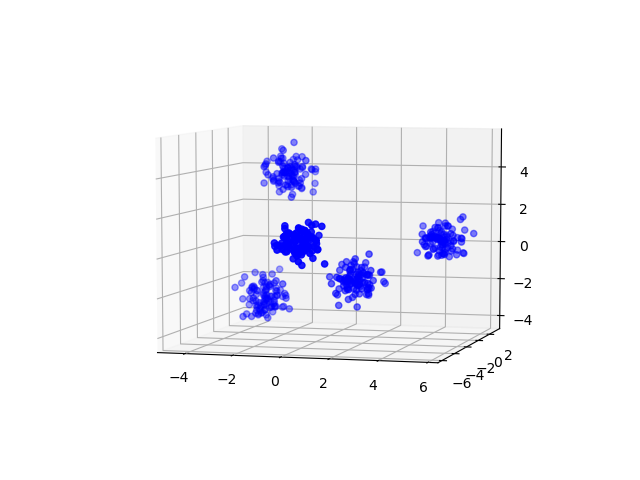

In [25]:
from mpl_toolkits import mplot3d

%matplotlib notebook

ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:,0], X_pca[:,1], X_pca[:,2], c='b')

<IPython.core.display.Javascript object>


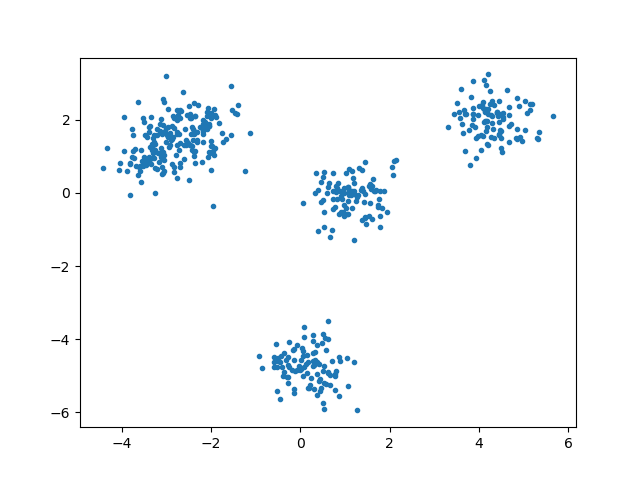

In [23]:
%matplotlib notebook

plt.plot(X_pca[:,0], X_pca[:,1], '.')

# Using scikit-learn:  Explained Variance

In [24]:
from sklearn.decomposition import PCA

pca = PCA(30)
pca.fit_transform(X)

array([[-2.87 , -1.834,  3.12 , ...,  0.345, -0.036,  0.166],
       [ 4.089, -2.476,  0.694, ..., -0.479, -0.372,  0.132],
       [-0.267,  5.201,  1.152, ...,  0.02 , -0.343,  0.226],
       ...,
       [-1.98 , -1.283,  5.339, ..., -0.357, -0.114, -0.316],
       [ 4.452, -1.599,  0.038, ..., -0.378, -0.087, -0.072],
       [-0.532,  4.768,  0.407, ...,  0.225,  0.297, -0.03 ]])

In [46]:
pca.explained_variance_ratio_

array([ 0.262,  0.236,  0.181,  0.118,  0.011,  0.011,  0.01 ,  0.01 ,
        0.01 ,  0.01 ,  0.009,  0.009,  0.009,  0.008,  0.008,  0.008,
        0.008,  0.007,  0.007,  0.007,  0.007,  0.007,  0.007,  0.006,
        0.006,  0.006,  0.006,  0.006,  0.005,  0.005])

<IPython.core.display.Javascript object>


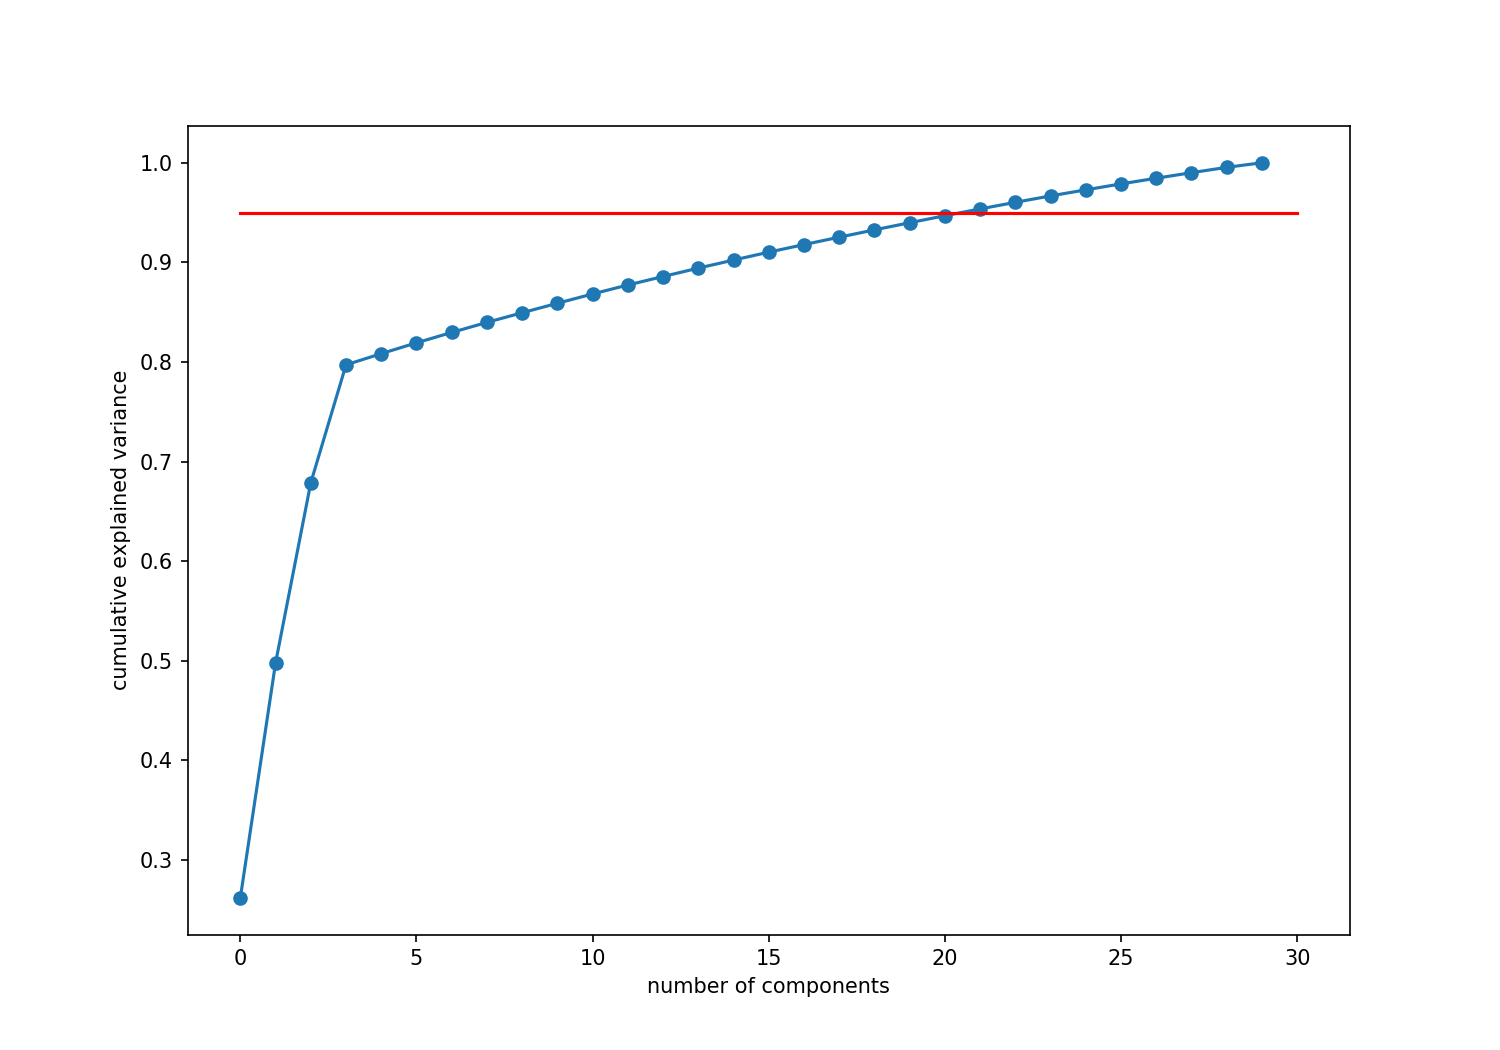

In [45]:
%matplotlib notebook

plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.plot([0,30], [0.95,0.95], '-r')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [22]:
evals

array([ 297.696,  268.016,  205.62 ,  134.548,   12.783,   12.35 ,
         11.837,    5.245,   11.488,   10.993,   10.805,   10.638,
         10.223,    6.085,    6.337,    6.457,    9.697,    9.552,
          6.792,    6.923,    9.206,    9.042,    7.331,    7.52 ,
          7.768,    7.99 ,    8.168,    8.601,    8.323,    8.48 ])

In [23]:
evals/evals.sum()

array([ 0.262,  0.236,  0.181,  0.118,  0.011,  0.011,  0.01 ,  0.005,
        0.01 ,  0.01 ,  0.01 ,  0.009,  0.009,  0.005,  0.006,  0.006,
        0.009,  0.008,  0.006,  0.006,  0.008,  0.008,  0.006,  0.007,
        0.007,  0.007,  0.007,  0.008,  0.007,  0.007])

In [24]:
np.cumsum(evals/evals.sum())

array([ 0.262,  0.498,  0.679,  0.797,  0.808,  0.819,  0.83 ,  0.834,
        0.844,  0.854,  0.864,  0.873,  0.882,  0.887,  0.893,  0.898,
        0.907,  0.915,  0.921,  0.927,  0.936,  0.944,  0.95 ,  0.957,
        0.963,  0.97 ,  0.978,  0.985,  0.993,  1.   ])